In [1]:
using thesis
using Plots
using JLD2
using LinearAlgebra
using DataFrames
using LaTeXStrings

In [12]:
function plot_results(
    data,
    errors,
    instrument,
    parameter_indx
)
    plots_2 = []
    parameters = ["Synchrotron index"]
    param_value = [-3.0]
    annotation = [L"0.5 \ \textrm{arcmin}", L"1 \ \textrm{arcmin}", L"5 \ \textrm{arcmin}"]
    tick_labels = ["altitude offset" "azimuth offset" "fork angle" "zVAX & ω=0°" "zVAX & ω=90°" "zVAX & ω=180°" "zVAX & ω=270°"]

    for (indx,e) in enumerate(error)
        
        ideal_value = [data[instrument][e]["ideal"]["x"][parameter_indx]]
        noise_effect = ideal_value .- (-3.0)

        #b = hline([0], color = :gray30)
        #b = bar(["ideal"], ideal_value .- -3.0)

        b = plot()

        for (indx_label, i) in enumerate(labels)
            b = bar!([tick_labels[indx_label]], 100 .* abs.(([data[instrument][e][i]["x"][parameter_indx]] .- ideal_value) ./ noise_effect), legend = false)
        end

        yaxis!(L"η \ [\%]")
        
        if indx != 3
            b = plot!(xticks=false)
        end
        
        annotate!(9, 15, annotation[indx], :grey10)

        push!(plots_2, b)
    end
    a = plot(plots_2..., size = (1300, 400), layout = (3,1),xrotation=45)
end

plot_results (generic function with 1 method)

In [3]:
instrument = ["lspe_planck_wmap"]
error = ["0_5arcmin" "1arcmin" "5arcmin"]
labels = ["altitude_offset" "ground_offset" "fork" "zVAX&ω_0" "zVAX&ω_90" "zVAX&ω_180" "zVAX&ω_270"]
tick_labels = ["altitude_offset" "azimuth_offset" "fork" "zVAX&ω_0" "zVAX&ω_90" "zVAX&ω_180" "zVAX&ω_270"]

1×7 Matrix{String}:
 "altitude_offset"  "azimuth_offset"  "fork"  …  "zVAX&ω_180"  "zVAX&ω_270"

In [4]:
data = Dict()
for i in instrument
    buffer = Dict()
    for e in error
        buffer[e] = JLD2.load("fgbuster/c1s0d0_nside128/results_"*i*"_"*e*".jld2")
    end
    data[i] = buffer
end

data_all = Dict()
for i in instrument
    buffer = Dict()
    for e in error
        buffer[e] = JLD2.load("fgbuster/c1s0d0_nside128_all/results_"*i*"_"*e*".jld2")
    end
    data_all[i] = buffer
end

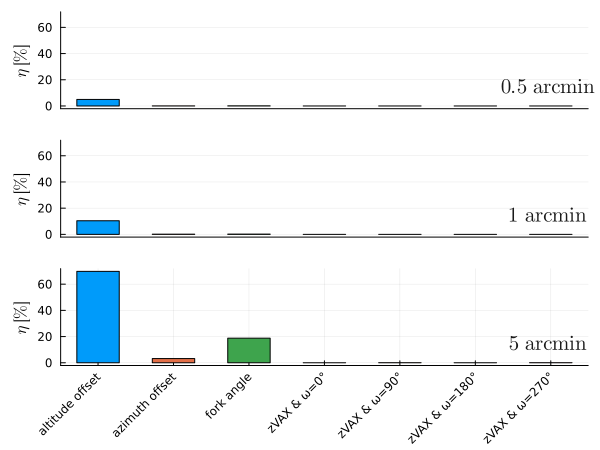

In [16]:
plots = []
for i in instrument
    push!(plots, plot_results(data_all, error, i, 1))
end
plot(plots..., layout = (1,3), size = (600, 450), link=:all, left_margin = 3Plots.mm, bottom_margin = 3Plots.mm)
#savefig("../results/fgbuster/beta_sync_all.pdf")

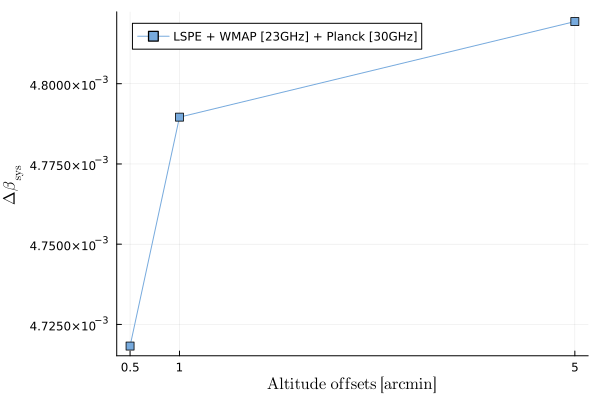

In [6]:
l = "altitude_offset"
i = "lspe_planck_wmap"

ideal = [data[i][k]["ideal"]["x"][1] for k in error]
ideal_all = [data_all[i][k]["ideal"]["x"][1] for k in error]

plot_data = [data[i][k][l]["x"][1] for k in error]
plot_data_all = [data_all[i][k][l]["x"][1] for k in error]

plot_x = [0.5/60, 1.0/60, 5.0/60]

plot(plot_x, [abs.(plot_data .- -3.0)...], marker=:square, label = "LSPE + WMAP [23GHz] + Planck [30GHz]", palette = :tol_light)

plot!(xticks = ([plot_x...],["0.5", "1", "5"]))
xaxis!(L"\textrm{Altitude \ offsets \ [arcmin]}")
yaxis!(L"\textrm{Δβ_\mathrm{sys}}")
#savefig("../results/fgbuster/altitude_all_vs_lspe.pdf")


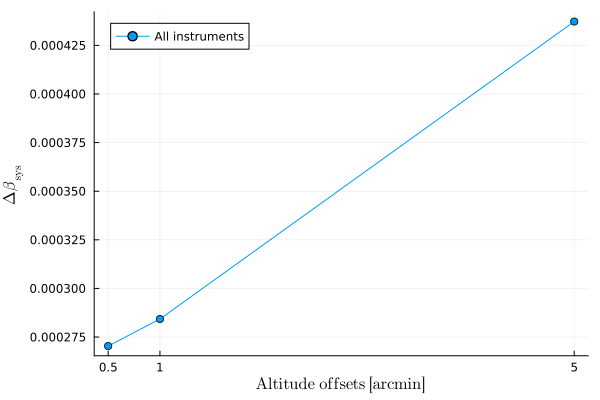

In [7]:
plot(plot_x, [abs.(plot_data_all .- -3.0)...], marker=:circle, label = "All instruments")

plot!(xticks = ([plot_x...],["0.5", "1", "5"]))
xaxis!(L"\textrm{Altitude \ offsets \ [arcmin]}")
yaxis!(L"\textrm{Δβ_\mathrm{sys}}")

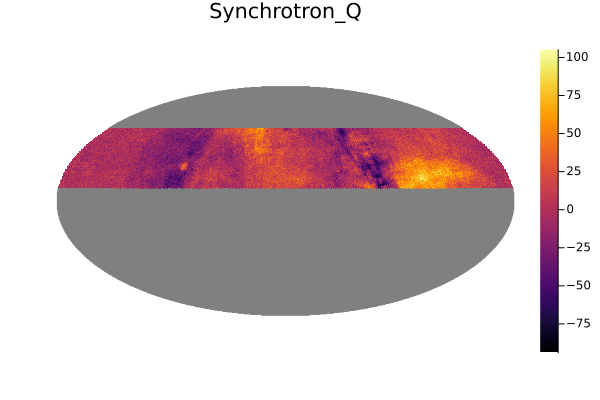

In [8]:
get_map_and_hist(data["lspe_planck_wmap"]["0_5arcmin"]["ideal"], "Q", 128)[1][3]

In [9]:
println(data_all["lspe_planck_wmap"]["5arcmin"]["ideal"]["x"][1] + 3.0 )

-0.0002575139474543242
